# Лабораторна робота №8
## Тема: Структура даних граф. Алгоритми на графах
### Виконала: Бояринцова Поліна
### Група: КН-24-1
### Дата: 16.05.2025

## 1. Реалізація прикладів

### 1.1. Приклад реалізації структури даних граф

In [4]:
class Vertex: 
    def __init__(self, key): 
        # Конструктор класу Vertex 
        self.id = key           # Ідентифікатор вершини 
        self.connectedTo = {}   # Словник суміжних вершин і ваг

    def addNeighbor(self, nbr, weight=0): 
        # Додає з'єднання між поточною вершиною та сусідньою із заданою вагою
        self.connectedTo[nbr] = weight 

    def __str__(self): 
        # Повертає рядкове представлення вершини
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo]) 

    def getConnections(self): 
        # Повертає список суміжних вершин
        return self.connectedTo.keys() 

    def getId(self): 
        # Повертає ідентифікатор вершини
        return self.id 

    def getWeight(self, nbr): 
        # Повертає вагу ребра між поточною вершиною та сусідньою
        return self.connectedTo[nbr]

### 1.2. Клас 𝐺𝑟𝑎𝑝ℎ

In [5]:
class Graph: 
    def __init__(self): 
        # Ініціалізація порожнього словника, що відображає імена вершин на об'єкти Vertex. 
        self.vertList = {} 
        # Ініціалізація лічильника вершин у графі. 
        self.numVertices = 0 
 
    def addVertex(self, key): 
        # Збільшення лічильника вершин та створення нового об'єкта Vertex. 
        self.numVertices += 1 
        newVertex = Vertex(key) 
        # Додавання нової вершини до словника. 
        self.vertList[key] = newVertex 
        return newVertex 
 
    def getVertex(self,n): 
        # Повертає об'єкт Vertex за його ім'ям. 
        if n in self.vertList: 
            return self.vertList[n] 
        else: 
            return None 
 
    def __contains__(self, n): 
        # Перевіряє, чи міститься вершина з заданим ім'ям у графі. 
        return n in self.vertList 
 
    def addEdge(self,f,t,cost=0): 
 # Додає зв'язок між вершинами з іменами f та t з вагою cost (за замовчуванням – 0). 
        if f not in self.vertList: 
            # Якщо вершини f ще немає у графі, додаємо її. 
            nv = self.addVertex(f) 
        if t not in self.vertList: 
            # Якщо вершини t ще немає у графі, додаємо її. 
            nv = self.addVertex(t) 
        # Додаємо зв'язок між вершинами f та t з вагою cost. 
        self.vertList[f].addNeighbor(self.vertList[t], cost) 
 
    def getVertices(self): 
        # Повертає список імен усіх вершин у графі. 
        return self.vertList.keys() 
 
    def __iter__(self): 
        # Повертає ітератор по об'єктах типу Vertex. 
        return iter(self.vertList.values())


### 1.3. Алгоритм Дейкстри 

In [6]:
import networkx as nx 
 
# Створюємо граф G (шляховий граф з 5 вершинами) 
G = nx.path_graph(5) 
 
# Знаходимо найкоротший шлях від вершини 0 до всіх інших вершин та їх довжини 
length, path = nx.single_source_dijkstra(G, 0) 
 
# Виводимо довжину найкоротшого шляху від вершини 0 до вершини 4 
print(length[4]) 
 
# Виводимо всі довжини найкоротших шляхів від вершини 0 до всіх інших вершин 
print(length) 

# Знаходимо найкоротший шлях від вершини 1 до всіх інших вершин та їх довжини 
nx.single_source_dijkstra(G, source=1) 

4
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


({1: 0, 0: 1, 2: 1, 3: 2, 4: 3},
 {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 3, 4]})

### 1.4. Алгоритм Беллмана-Форда 

In [7]:
import networkx as nx 
 
# Створюємо граф G (шляховий граф з 5 вершинами) 
G = nx.path_graph(5) 
 
# Знаходимо найкоротший шлях від вершини 0 до всіх інших вершин та їх довжини 
length = nx.single_source_bellman_ford_path_length(G, 0) 
 
# Виводимо довжину найкоротшого шляху від вершини 0 до вершини 4 
print(length[4]) 
 
# Виводимо всі довжини найкоротших шляхів від вершини 0 до всіх інших вершин 
print(length) 
 
# Знаходимо найкоротший шлях від вершини 1 до всіх інших вершин та їх довжини 
nx.single_source_bellman_ford_path_length(G, source=1)  

4
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


{1: 0, 0: 1, 2: 1, 3: 2, 4: 3}

### 1.5. Візуалізація графа

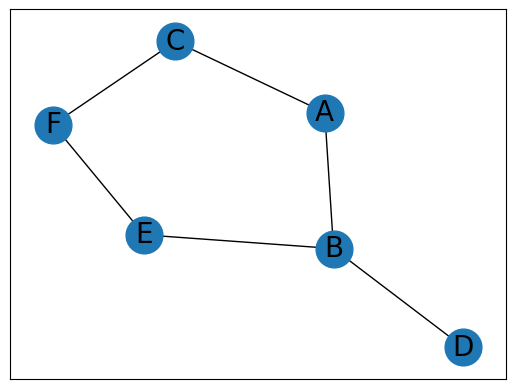

In [8]:
# Виклик magic-команди, яка автоматично відображає графіки у рядку 
%matplotlib inline 
 
# Імпорт необхідних бібліотек 
import networkx as nx 
import matplotlib.pyplot as plt 
 
# Створення пустого графа 
G = nx.Graph() 
 
# Додавання вершин та ребер 
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F']) 
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), 
                  ('B', 'E'), ('C', 'F'), ('E', 'F')]) 
 
# Визначення позицій вершин для відображення графа 
pos = nx.spring_layout(G) 
 
# Візуалізація вершин та їх міток 
nx.draw_networkx_nodes(G, pos, node_size=700) 
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif') 
 
# Візуалізація ребер 
nx.draw_networkx_edges(G, pos, edgelist=G.edges()) 
 
# Показ графіка 
plt.show()

### 1.6. Алгоритм пошуку в глибину (DFS)

In [15]:
import networkx as nx

# Створення графа
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'),
                  ('B', 'E'), ('C', 'F'), ('E', 'F')])

# DFS — обхід у глибину, повертає всі досяжні вершини з даної
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()  # Створюємо пустий набір для збереження відвіданих вершин
    visited.add(start)  # Додаємо поточну вершину до відвіданих
    # Перебираємо всі суміжні вершини, які ще не були відвідані
    for next in set(graph.adj[start].keys()) - visited:
        dfs(graph, next, visited)  # Рекурсивний виклик
    return visited

# Виклик DFS з вершини 'C'
print(dfs(G, 'C'))

{'A', 'F', 'C', 'E', 'B', 'D'}


In [21]:
# Функція dfs_paths також використовує алгоритм пошуку в глибину (DFS), 
# але вона знаходить всі можливі шляхи з початкової вершини до цільової вершини. 
# Параметр path використовується для зберігання поточного шляху. 
def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]  # Починаємо шлях з початкової вершини
    if start == goal:
        yield path  # Досягли мети — повертаємо шлях
    # Перебираємо всі сусідні вершини поточної вершини, які ще не відвідані 
    for next in set(graph.adj[start].keys()) - set(path):
        yield from dfs_paths(graph, next, goal, path + [next])  # Рекурсія з оновленим шляхом

# Викликаємо функцію dfs_paths з графом G, початковою вершиною 'C' та цільовою вершиною 'F' 
print(list(dfs_paths(G, 'C', 'F')))

[['C', 'A', 'B', 'E', 'F'], ['C', 'F']]


### 1.7. Пошук у ширину (breadth-first search, BFS)

In [19]:
def bfs_paths(graph, start, goal): 
    # Створення черги з початковою вершиною та її шляхом 
    queue = [(start, [start])] 
    # Поки черга не порожня 
    while queue: 
        # Вибір вершини та її шляху з початка черги 
        (vertex, path) = queue.pop(0) 
        # Для кожної сусідньої вершини 
        for next in set(graph.adj[vertex].keys()) - set(path): 
            # Якщо сусідня вершина є цільовою 
            if next == goal: 
                # Повернення шляху, якщо досягнуто цільову вершину 
                yield path + [next] 
            else: 
                # Додавання сусідньої вершини та нового шляху в чергу 
                queue.append((next, path + [next])) 
# Виведення усіх шляхів від вершини 'A' до вершини 'F' за допомогою пошуку в ширину 
list(bfs_paths(G, 'A', 'F')) 

[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

## 2. Виконання завдання

### 2.1. Алгоритм Дейкстри

In [1]:
import networkx as nx

# Створюємо граф з новою структурою
G = nx.DiGraph()
G.add_edge('A', 'B', weight=3)
G.add_edge('A', 'C', weight=1)
G.add_edge('B', 'D', weight=2)
G.add_edge('C', 'D', weight=4)
G.add_edge('C', 'E', weight=2)
G.add_edge('E', 'D', weight=1)
G.add_edge('D', 'F', weight=5)

# Знаходимо найкоротший шлях від 'A' до всіх інших
length, path = nx.single_source_dijkstra(G, 'A')

# Виводимо довжину найкоротшого шляху від 'A' до 'F'
print("Довжина найкоротшого шляху від A до F:", length['F'])

# Виводимо всі довжини найкоротших шляхів
print("Довжини до всіх вершин:", length)

Довжина найкоротшого шляху від A до F: 9
Довжини до всіх вершин: {'A': 0, 'C': 1, 'B': 3, 'E': 3, 'D': 4, 'F': 9}


### 2.2. Алгоритм Беллмана-Форда

In [2]:
import networkx as nx

# Створюємо граф з новими вершинами та вагами
G = nx.DiGraph()
G.add_edge('A', 'B', weight=3)
G.add_edge('A', 'C', weight=1)
G.add_edge('B', 'D', weight=2)
G.add_edge('C', 'D', weight=4)
G.add_edge('C', 'E', weight=2)
G.add_edge('E', 'D', weight=1)
G.add_edge('D', 'F', weight=5)

# Обчислюємо довжини найкоротших шляхів від вершини 'A'
length = nx.single_source_bellman_ford_path_length(G, 'A')

# Виводимо довжину найкоротшого шляху від 'A' до 'F'
print("Довжина найкоротшого шляху від A до F (Беллман-Форд):", length['F'])

# Виводимо всі довжини
print("Довжини до всіх вершин (Беллман-Форд):", length)

Довжина найкоротшого шляху від A до F (Беллман-Форд): 9
Довжини до всіх вершин (Беллман-Форд): {'A': 0, 'B': 3, 'C': 1, 'D': 4, 'E': 3, 'F': 9}


### Побудова графа для DFS/BFS

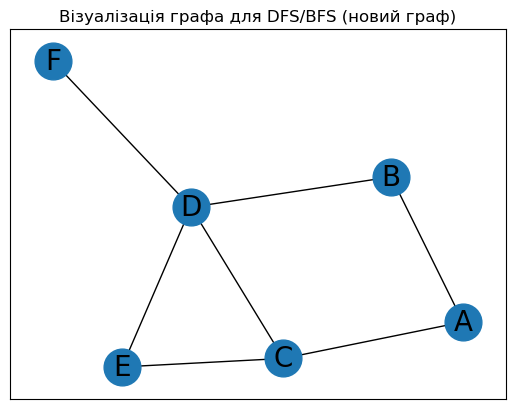

In [7]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

# Створюємо граф без напрямків (для DFS/BFS)
G = nx.Graph()

# Додаємо нові вершини та ребра
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'),
                  ('C', 'D'), ('C', 'E'), ('E', 'D'), ('D', 'F')])

# Побудова графіка
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20)
# Візуалізація ребер 
nx.draw_networkx_edges(G, pos)
plt.title("Візуалізація графа для DFS/BFS (новий граф)")
plt.show()

### 2.3.1. DFS (обхід у глибину)

In [4]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for next in set(graph.adj[start].keys()) - visited:
        dfs(graph, next, visited)
    return visited

# Запуск DFS з вершини 'A'
visited_nodes = dfs(G, 'A')
print("Вершини, відвідані за DFS:", visited_nodes)

Вершини, відвідані за DFS: {'B', 'D', 'C', 'E', 'F', 'A'}


### 2.3.2. DFS: пошук усіх шляхів від A до F

In [5]:
def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]
    if start == goal:
        yield path
    for next in set(graph.adj[start].keys()) - set(path):
        yield from dfs_paths(graph, next, goal, path + [next])

# Знаходження всіх шляхів з 'A' до 'F'
all_paths = list(dfs_paths(G, 'A', 'F'))
print("Всі шляхи з A до F (DFS):", all_paths)

Всі шляхи з A до F (DFS): [['A', 'B', 'D', 'F'], ['A', 'C', 'E', 'D', 'F'], ['A', 'C', 'D', 'F']]


### 2.4. BFS: пошук усіх шляхів від A до F

In [6]:
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in set(graph.adj[vertex].keys()) - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

# Знаходження всіх шляхів з 'A' до 'F' за BFS
bfs_result = list(bfs_paths(G, 'A', 'F'))
print("Всі шляхи з A до F (BFS):", bfs_result)

Всі шляхи з A до F (BFS): [['A', 'B', 'D', 'F'], ['A', 'C', 'D', 'F'], ['A', 'C', 'E', 'D', 'F']]


## 3. Контрольні питання

### 1. Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи. 

Граф — це математична структура, яка складається з множини вершин (або вузлів) та множини ребер (або дуг), які з'єднують пари вершин. Граф може бути орієнтованим (ребра мають напрямок) або неорієнтованим (ребра не мають напрямку).
Приклади застосування графів:

- Мережі доріг та транспортні маршрути (вершини — перехрестя, ребра — дороги);
- Соціальні мережі (вершини — користувачі, ребра — дружба або підписка);
- Мережі комунікацій (комп’ютери як вершини, канали зв’язку — ребра);
- Задачі планування і оптимізації, наприклад, найкоротший шлях.

### 2. Які основні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами. 

Основні види графів:

- Неорієнтований граф — ребра не мають напрямку, зв’язок між вершинами двонаправлений.
- Орієнтований граф (орграф) — ребра мають напрямок від однієї вершини до іншої.
- Зважений граф — кожне ребро має вагу (вартість).
- Незважений граф — ребра без ваг.
- Простий граф — без петель і кратних ребер.
- Мультиграф — допускає кратні ребра між одними й тими ж вершинами.
- Циклічний та ациклічний граф — залежно від наявності циклів.

### 3. Як можна представити граф у пам’яті комп'ютера? Опишіть структури даних, які використовуються для зберігання графів. 

Основні структури даних для зберігання графів:

- Матриця суміжності:
Двовимірний масив розміру |V|×|V|, де |V| — кількість вершин.
Елемент matrix[i][j] дорівнює 1 (або вазі ребра), якщо існує ребро з вершини i в вершину j, і 0 — інакше.
Переваги: швидкий доступ для перевірки наявності ребра.
Недоліки: велика пам'ять для розріджених графів.
- Список суміжності:
Для кожної вершини зберігається список її сусідів (вершин, з якими вона з’єднана ребром).
Переваги: ефективне збереження розріджених графів, економія пам’яті.
Недоліки: повільніший доступ для перевірки конкретного ребра.
- Список ребер:
Масив або список, де зберігаються всі ребра графа як пари (або трійки для зважених) вершин.

### 4. Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм. 

- Алгоритм BFS:
Починається з початкової вершини.
Використовує чергу для послідовного обходу сусідніх вершин по рівнях: спочатку всі вершини на відстані 1, потім 2 і т.д.
Відвідує вершини рівень за рівнем, гарантуючи, що найкоротший шлях (в термінах кількості ребер) до будь-якої вершини буде знайдений.
- Приклади застосування BFS:
Пошук найкоротшого шляху в невагомому графі.
Перевірка зв’язності графа.
Пошук у лабіринтах.
Розподіл ресурсів у мережах.

### 5. Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Дайте приклади задач, де використовується DFS.

- Алгоритм DFS:
Рекурсивний або з використанням стеку метод обходу графа.
Глибоко заходить у граф, рухаючись від поточної вершини до сусіда, доки можна. Потім повертається назад, щоб дослідити інші гілки.
- Відмінність від BFS:
DFS заходить «вглиб» однієї гілки, BFS — обходить рівнями.
DFS може використовуватися для перевірки циклів, топологічного сортування, пошуку компонент зв’язності.
BFS гарантовано знайде найкоротший шлях у невагомому графі, DFS — ні.
- Приклади задач для DFS:
Знаходження всіх шляхів між двома вершинами.
Перевірка ациклічності графа.
Топологічне сортування.
Пошук сильнозв’язних компонент.

### 6. Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму? 

- Алгоритм Дейкстри:
Починається з початкової вершини, встановлює відстані до всіх інших вершин як нескінченність, окрім початкової (0).
Вибирає вершину з найменшою відомою відстанню, оновлює відстані до її сусідів, якщо вони можуть бути покращені через неї.
Повторює процес, доки всі вершини не будуть оброблені.
- Умови для роботи алгоритму:
Граф має бути зваженим з невід’ємними вагами ребер (ваги ≥ 0).
Якщо є негативні ребра — алгоритм Дейкстри може дати некоректний результат.